In [18]:
import pandas as pd

# Replace 'your_file.csv' with the path to your actual CSV file
df = pd.read_csv('DG_out.csv')

# Display the first few rows of the DataFrame
print(df.head())

                                             tx_hash  indegree  outdegree  \
0  0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...         0          1   
1  f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...         1          2   
2  ea44e97271691990157559d0bdd9959e02790c34db6c00...         1          1   
3  a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...         1          1   
4  591e91f809d716912ca1d4a9295e70c3e78bab077683f7...         1          2   

   in_btc  out_btc  total_btc  mean_in_btc  mean_out_btc  in_malicious  \
0     0.0     50.0       50.0          0.0          50.0             0   
1    50.0     50.0      100.0         50.0          25.0             0   
2    10.0     10.0       20.0         10.0          10.0             0   
3    40.0     30.0       70.0         40.0          30.0             0   
4    30.0     30.0       60.0         30.0          15.0             0   

   out_malicious  is_malicious  out_and_tx_malicious  all_malicious  
0              0      

In [20]:
# Label for easier filtering
df['malicious_label'] = df['is_malicious'].map({0: 'non_malicious', 1: 'malicious'})

# BTC flow difference (inflow - outflow)
df['btc_flow_diff'] = df['in_btc'] - df['out_btc']

# In/Out BTC ratio (with safeguard against division by zero)
df['in_out_ratio'] = df['in_btc'] / (df['out_btc'] + 1e-6)

In [22]:
df.head()

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious,malicious_label,btc_flow_diff,in_out_ratio
0,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...,0,1,0.0,50.0,50.0,0.0,50.0,0,0,0,0,0,non_malicious,-50.0,0.000000
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,1,2,50.0,50.0,100.0,50.0,25.0,0,0,0,0,0,non_malicious,0.0,1.000000
2,ea44e97271691990157559d0bdd9959e02790c34db6c00...,1,1,10.0,10.0,20.0,10.0,10.0,0,0,0,0,0,non_malicious,0.0,1.000000
3,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,1,1,40.0,30.0,70.0,40.0,30.0,0,0,0,0,0,non_malicious,10.0,1.333333
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,1,2,30.0,30.0,60.0,30.0,15.0,0,0,0,0,0,non_malicious,0.0,1.000000


In [ ]:
df.to_parquet("blockchain_data.parquet", index=False)

In [4]:
df.to_csv('output.csv', index=False)

In [5]:
df.size

393225742

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30248134 entries, 0 to 30248133
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   tx_hash               object 
 1   indegree              int64  
 2   outdegree             int64  
 3   in_btc                float64
 4   out_btc               float64
 5   total_btc             float64
 6   mean_in_btc           float64
 7   mean_out_btc          float64
 8   in_malicious          int64  
 9   out_malicious         int64  
 10  is_malicious          int64  
 11  out_and_tx_malicious  int64  
 12  all_malicious         int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 2.9+ GB


In [7]:
df.shape

(30248134, 13)

In [8]:
first_10 = df.head(10)

# Save them to a new CSV
first_10.to_csv('first_10_rows.csv', index=False)

           indegree     outdegree        in_btc       out_btc     total_btc  \
count  3.024813e+07  3.024813e+07  3.024813e+07  3.024813e+07  3.024813e+07   
mean   2.148699e+00  2.148699e+00  5.484150e+01  5.484150e+01  1.096830e+02   
std    7.421447e+00  4.512048e+00  1.303303e+03  1.301473e+03  2.602527e+03   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  2.000000e+00  1.000000e-01  9.950000e-02  2.058720e-01   
50%    1.000000e+00  2.000000e+00  9.325000e-01  9.590000e-01  1.964759e+00   
75%    2.000000e+00  2.000000e+00  8.591912e+00  9.063657e+00  1.840000e+01   
max    1.932000e+03  1.322000e+03  5.500000e+05  5.000207e+05  1.050000e+06   

        mean_in_btc  mean_out_btc  in_malicious  out_malicious  is_malicious  \
count  3.024813e+07  3.024813e+07  3.024813e+07   3.024813e+07  3.024813e+07   
mean   4.923980e+01  2.877087e+01  4.039919e-05   2.148893e-06  1.553815e-06   
std    9.729210e+02  7.125567e+02  6.355907e-03 

KeyboardInterrupt: 

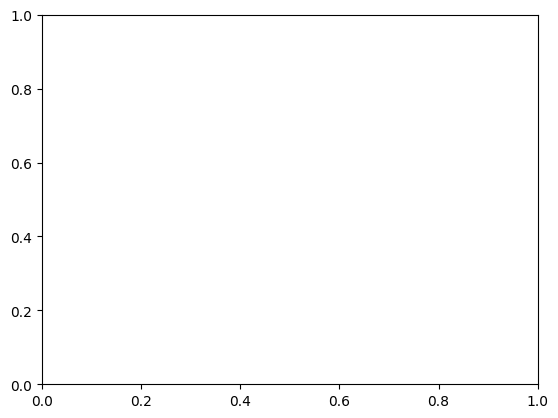

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary stats
print(df.describe())

# Check class balance
sns.countplot(x='is_malicious', data=df)
plt.title("Malicious vs Non-Malicious Transactions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns='tx_hash').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot to visualize relationships (for a small sample like this)
# sns.pairplot(df.drop(columns='tx_hash'), hue='is_malicious')
# plt.show()

In [ ]:
print(df['is_malicious'].value_counts())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(columns='tx_hash').corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution plots
btc_cols = ['in_btc', 'out_btc', 'total_btc', 'mean_in_btc', 'mean_out_btc']
df[btc_cols].hist(bins=50, figsize=(15, 8))
plt.tight_layout()
plt.show()

# Boxplot comparison
sns.boxplot(data=df, x='is_malicious', y='total_btc')
plt.title("Total BTC by Malicious Flag")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Feature selection
features = df.drop(columns=['tx_hash', 'is_malicious'])
labels = df['is_malicious']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels)

# Train model
model = RandomForestClassifier(n_jobs=-1, max_depth=10, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Null values check
print(df.isnull().sum())

# Class balance
print(df['is_malicious'].value_counts())
sns.countplot(x='is_malicious', data=df)
plt.title('Malicious vs Non-Malicious Transactions')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns='tx_hash').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
# Avoid division by zero
df['in_out_ratio'] = df['in_btc'] / (df['out_btc'] + 1e-6)
df['btc_flow_diff'] = df['in_btc'] - df['out_btc']

In [ ]:
# Aggregated summaries by is_malicious flag
agg_df = df.groupby('is_malicious').agg({
    'in_btc': ['mean', 'sum'],
    'out_btc': ['mean', 'sum'],
    'total_btc': ['mean', 'sum'],
    'mean_in_btc': 'mean',
    'mean_out_btc': 'mean',
    'indegree': 'mean',
    'outdegree': 'mean',
    'in_malicious': 'sum',
    'out_malicious': 'sum',
    'tx_hash': 'count'
}).reset_index()

# Flatten multi-level column names
agg_df.columns = ['is_malicious'] + [f'{i}_{j}' for i, j in agg_df.columns[1:]]

print(agg_df)

In [ ]:
# Cleaned + enriched data
df.to_parquet("gold_layer/cleaned_transactions.parquet", index=False)

# Aggregated summary
agg_df.to_parquet("gold_layer/aggregated_summary.parquet", index=False)

In [10]:
df['is_malicious'] = df['is_malicious'].map({0: 'non_malicious', 1: 'malicious'})

In [12]:
df.head()

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...,0,1,0.0,50.0,50.0,0.0,50.0,0,0,non_malicious,0,0
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,1,2,50.0,50.0,100.0,50.0,25.0,0,0,non_malicious,0,0
2,ea44e97271691990157559d0bdd9959e02790c34db6c00...,1,1,10.0,10.0,20.0,10.0,10.0,0,0,non_malicious,0,0
3,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,1,1,40.0,30.0,70.0,40.0,30.0,0,0,non_malicious,0,0
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,1,2,30.0,30.0,60.0,30.0,15.0,0,0,non_malicious,0,0


In [16]:
df['malicious_rows'] = df['is_malicious'].apply(lambda x: 1 if x == 1 else None)
df['non_malicious_rows'] = df['is_malicious'].apply(lambda x: 0 if x == 0 else None)
df.head()

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious,malicious_rows,non_malicious_rows
0,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...,0,1,0.0,50.0,50.0,0.0,50.0,0,0,0,0,0,NaN,0.0
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,1,2,50.0,50.0,100.0,50.0,25.0,0,0,0,0,0,NaN,0.0
2,ea44e97271691990157559d0bdd9959e02790c34db6c00...,1,1,10.0,10.0,20.0,10.0,10.0,0,0,0,0,0,NaN,0.0
3,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,1,1,40.0,30.0,70.0,40.0,30.0,0,0,0,0,0,NaN,0.0
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,1,2,30.0,30.0,60.0,30.0,15.0,0,0,0,0,0,NaN,0.0


In [24]:
import pandas as pd

# Load the full dataset (replace with your actual file path)
# df = pd.read_csv('first_10_rows.csv')

# Check if there are any malicious transactions (in the full 3M rows)
malicious_rows = df[df['is_malicious'] == 1]
non_malicious_rows = df[df['is_malicious'] == 0]

# Sample a fraction of non-malicious rows (e.g., 10% or a fixed number)
sampled_non_malicious = non_malicious_rows.sample(frac=0.1, random_state=42)  # Adjust frac as needed

# Combine the malicious and sampled non-malicious rows
shortened_df = pd.concat([malicious_rows, sampled_non_malicious])

# Save the shortened dataset
shortened_df.to_csv('shortened_blockchain_data.csv', index=False)

In [25]:
shortened_df.head()

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious,malicious_label,btc_flow_diff,in_out_ratio
385224,4885ddf124a0f97b5a3775a12de0274d342d12842ebe59...,478,2,25000.620000,25000.010000,50000.630000,52.302552,12500.005000,0,0,1,1,1,malicious,0.6100,1.000024
2242631,5a09f4ef0e91bc7bc044365cd27236fe4ac3c02088ac21...,191,2,1999.042164,1999.024664,3998.066829,10.466189,999.512332,0,0,1,1,1,malicious,0.0175,1.000009
2252738,ff04763e3e8c93e43799dbbca833e183faad7e2611f20f...,6,2,2000.010000,2000.010000,4000.020000,333.335000,1000.005000,0,0,1,1,1,malicious,0.0000,1.000000
2256885,7b45c1742ca9f544cccd92d319ef8a5e19b7dcb8742990...,7,2,20555.010000,20555.010000,41110.020000,2936.430000,10277.505000,0,0,1,1,1,malicious,0.0000,1.000000
2264158,901dbcef30a541b8b55fae8f7ad9917ef0754bda5b6437...,4,2,3000.010028,3000.010028,6000.020055,750.002507,1500.005014,0,0,1,1,1,malicious,0.0000,1.000000


In [30]:
shortened_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3024856 entries, 385224 to 30197324
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   tx_hash               object 
 1   indegree              int64  
 2   outdegree             int64  
 3   in_btc                float64
 4   out_btc               float64
 5   total_btc             float64
 6   mean_in_btc           float64
 7   mean_out_btc          float64
 8   in_malicious          int64  
 9   out_malicious         int64  
 10  is_malicious          int64  
 11  out_and_tx_malicious  int64  
 12  all_malicious         int64  
 13  malicious_label       object 
 14  btc_flow_diff         float64
 15  in_out_ratio          float64
dtypes: float64(7), int64(7), object(2)
memory usage: 392.3+ MB


In [32]:
shortened_df.shape

(3024856, 16)

In [34]:
df.shape

(30248134, 16)